In [1]:
from src.dataOps.formatData import initialize_xslx_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style()
sns.set_theme()

In [3]:
path = '../samples/Обработано__Svodniy_otchet_po_chasam_intensivnost+skorost_01_01_2024_31_12_202411111111.xlsx'

In [20]:
initial_df = pd.read_excel(
    path, sheet_name=0, header=[0, 1])
df = initialize_xslx_data(initial_df)
df

/home/nick/transportation/src/dataOps/formatData.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, 'coerce', dayfirst=True)


Общая интенсивность автомобилей  \
                                                                   Итого   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                                   
2024-01-01 00:59:59                                                169.0   
2024-01-01 01:59:59                                                261.0   
2024-01-01 02:59:59                                                251.0   
2024-01-01 03:59:59                                                168.0   
2024-01-01 04:59:59                                                138.0   
...                                                                  ...   
2024-12-31 19:59:59                                                617.0   
2024-12-31 20:59:59                                                481.0   
2024-12-31 21:59:59                                                369.0   
2024-12-31 22:59:59                                                316.0   
2024-12-31 23:59:59                                                214.0   

                                                         Легковые (до 6 м)  \
                                         Прямое Обратное             Итого   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                                     
2024-01-01 00:59:59                       112.0     57.0             167.0   
2024-01-01 01:59:59                       156.0    105.0             260.0   
2024-01-01 02:59:59                       147.0    104.0             251.0   
2024-01-01 03:59:59                        94.0      NaN             167.0   
2024-01-01 04:59:59                        74.0      NaN             136.0   
...                                         ...      ...               ...   
2024-12-31 19:59:59                       351.0    266.0             596.0   
2024-12-31 20:59:59                       261.0    220.0             475.0   
2024-12-31 21:59:59                       189.0    180.0             365.0   
2024-12-31 22:59:59                       180.0    136.0             312.0   
2024-12-31 23:59:59                       102.0    112.0             210.0   

                                                         Малые груз. (6-9 м)  \
                                         Прямое Обратное               Итого   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                                       
2024-01-01 00:59:59                       110.0     57.0                 1.0   
2024-01-01 01:59:59                       156.0    104.0                 1.0   
2024-01-01 02:59:59                       147.0    104.0                 0.0   
2024-01-01 03:59:59                        94.0     73.0                 1.0   
2024-01-01 04:59:59                        72.0     64.0                 1.0   
...                                         ...      ...                 ...   
2024-12-31 19:59:59                       333.0    263.0                 5.0   
2024-12-31 20:59:59                       257.0    218.0                 3.0   
2024-12-31 21:59:59                       187.0    178.0                 1.0   
2024-12-31 22:59:59                       178.0    134.0                 2.0   
2024-12-31 23:59:59                        99.0    111.0                 3.0   

                                                         Грузовые (9-13 м)  \
                                         Прямое Обратное             Итого   
(Unnamed: 0_level_0, Unnamed: 0_level_1)                                     
2024-01-01 00:59:59                         1.0      0.0               1.0   
2024-01-01 01:59:59                         0.0      1.0               0.0   
2024-01-01 02:59:59                         0.0      0.0               0.0   
2024-01-01 03:59:59                         0.0      1.0               0.0   
2024-01-01 04:59:59                         1.0      0.0               1.0   
...                                         ...      ...               ...   
2024-12-31 19:59:59                         4.0      1.0    

In [21]:
df.index.name = 'Дата и время'
col = df['Общая интенсивность автомобилей']['Итого']

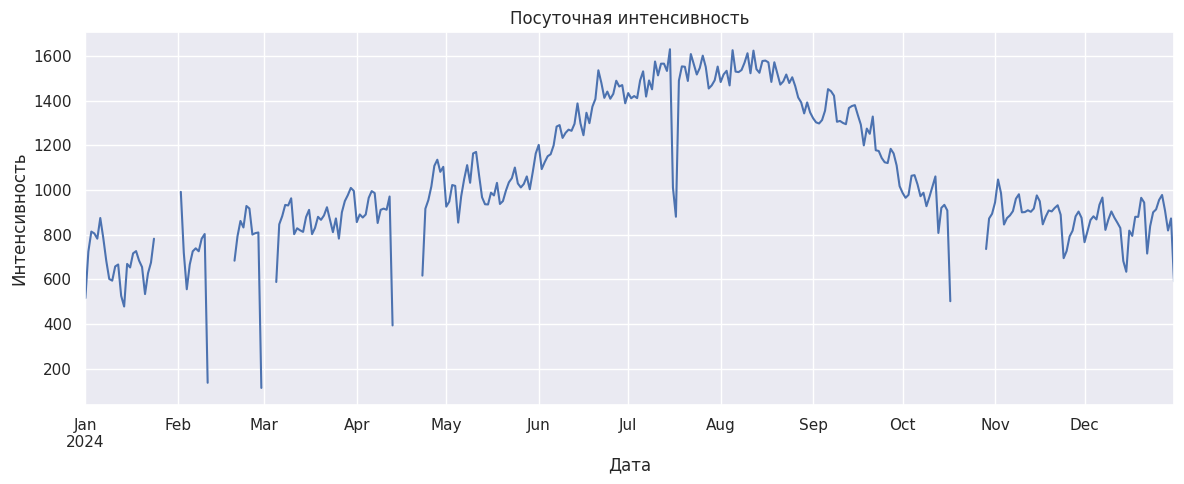

In [22]:
# или .sum() — если хотите суммарную интенсивность
daily_avg = col.resample('D').mean()

# Строим график
daily_avg.plot(figsize=(12, 5), title='Посуточная интенсивность')
plt.xlabel('Дата')
plt.ylabel('Интенсивность')
plt.grid(True)
plt.tight_layout()
plt.show()